In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Para poder leer y trabajar con los precios de las acciones
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# Para la fecha de los datos
from datetime import datetime


# Lista con el nombre de las acciones que vamos a utilizar
tech_list = ['AAPL', 'GOOG', 'MSFT', 'META']

# Defininimos qué fechas queremos de los datos
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, META]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "META"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-18,499.820007,512.210022,499.040009,501.799988,501.799988,14808700,META
2024-04-19,502.799988,502.799988,475.730011,481.070007,481.070007,25111000,META
2024-04-22,489.720001,492.010010,473.399994,481.730011,481.730011,17271100,META
2024-04-23,491.250000,498.760010,488.970001,496.100006,496.100006,15079200,META
2024-04-24,508.059998,510.000000,484.579987,493.500000,493.500000,37772700,META
2024-04-25,421.399994,445.769989,414.500000,441.380005,441.380005,82890700,META
2024-04-26,441.459991,446.440002,431.959991,443.290009,443.290009,32691400,META
2024-04-29,439.559998,439.760010,428.559998,432.619995,432.619995,21502600,META
2024-04-30,431.049988,439.619995,429.720001,430.170013,430.170013,18429500,META


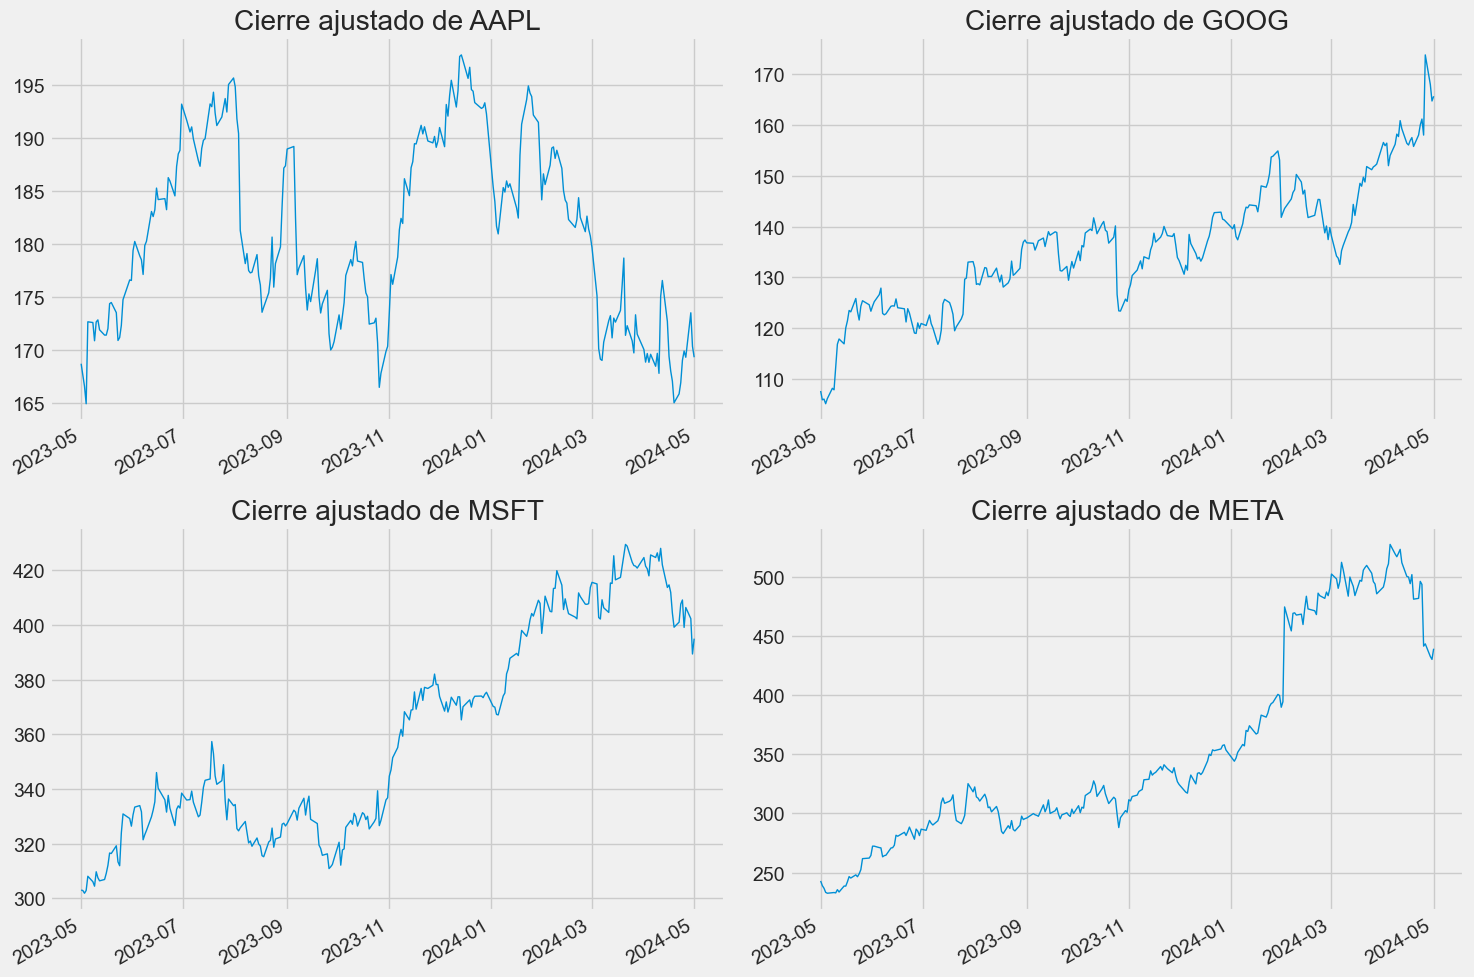

In [79]:
#Graficamos los precios de las acciones de este último año
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(linewidth = 1)
    
    plt.xlabel(None)
    plt.title(f"Cierre ajustado de {tech_list[i - 1]}")
    
plt.tight_layout()

[*********************100%%**********************]  4 of 4 completed


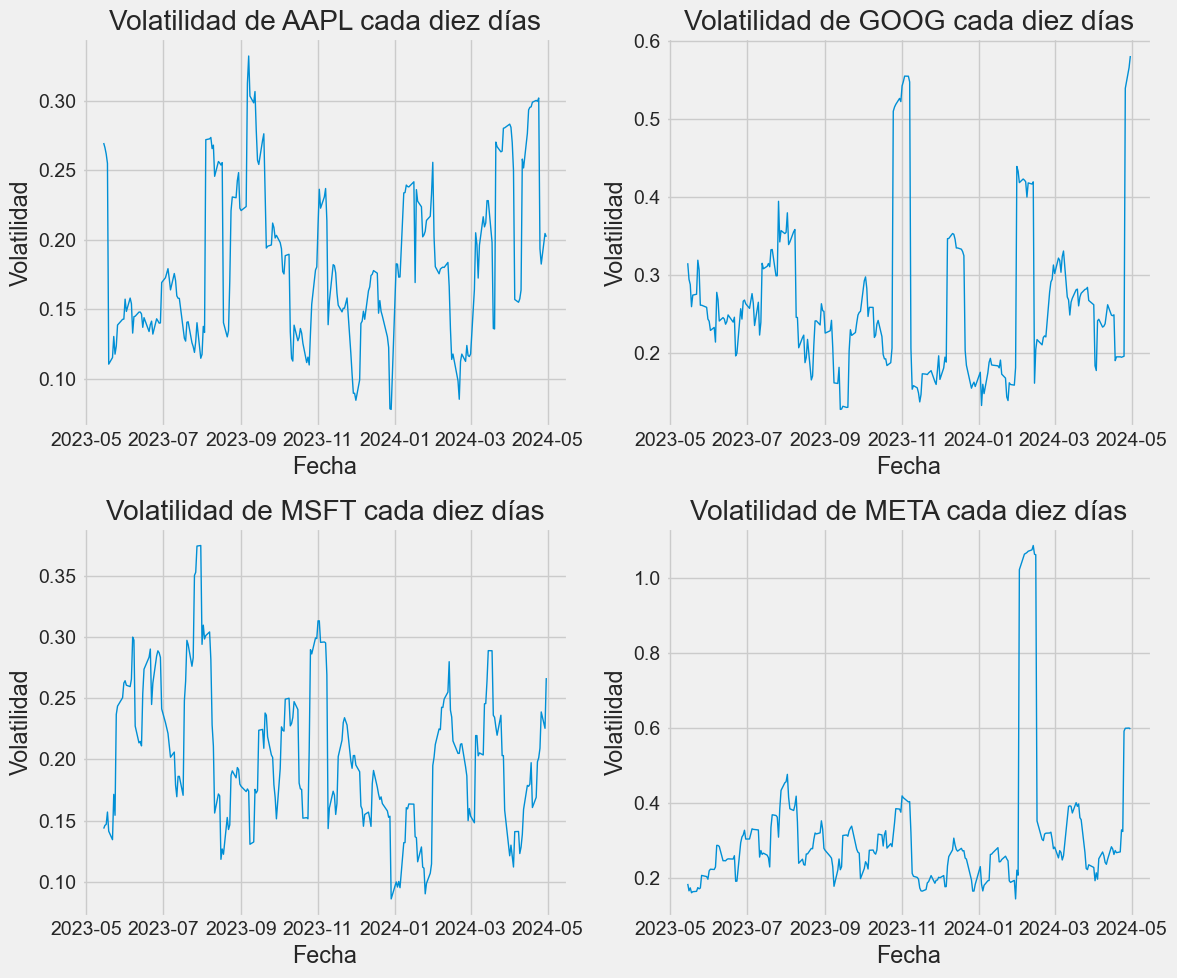

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

# Lista de tickers de las empresas
tickers = ["AAPL", "GOOG", "MSFT", "META"]

# Obtener los datos de precios de las acciones para el último año
start_date = "2023-05-01"
end_date = "2024-05-01"

data = yf.download(tickers, start=start_date, end=end_date)

# Calcular los retornos diarios
returns = data["Adj Close"].pct_change()

# Calcular la volatilidad para cada diez días
volatility_10_days = returns.rolling(window=10).std() * (252 ** 0.5)  # Ventana de 10 días, asumiendo 252 días hábiles en un año

# Crear subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Graficar la volatilidad para cada empresa en subgráficos separados
for i, ticker in enumerate(tickers):
    row = i // 2
    col = i % 2
    axes[row, col].plot(volatility_10_days[ticker], linewidth=1)
    axes[row, col].set_title(f'Volatilidad de {ticker} cada diez días')
    axes[row, col].set_xlabel('Fecha')
    axes[row, col].set_ylabel('Volatilidad')

plt.tight_layout()
plt.show()

[*********************100%%**********************]  4 of 4 completed

Volatilidad anualizada:
AAPL: 0.20
GOOG: 0.29
MSFT: 0.36
META: 0.21


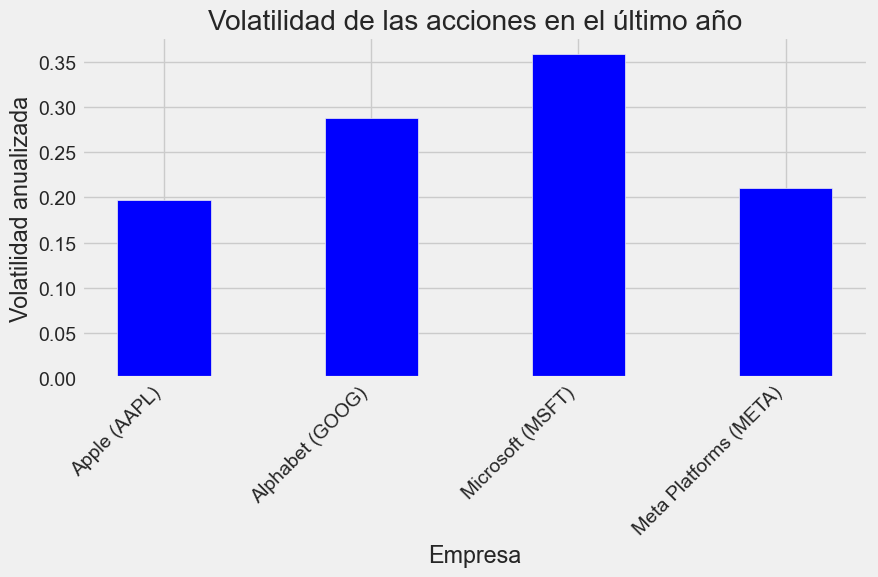

In [7]:
import yfinance as yf

# Lista de tickers de las empresas
tickers = ["AAPL", "GOOG", "MSFT", "META"]

# Obtener los datos de precios de las acciones para el último año
start_date = "2023-05-01"
end_date = "2024-05-01"

data = yf.download(tickers, start=start_date, end=end_date)

# Calcular los retornos diarios
returns = data["Adj Close"].pct_change()

# Calcular la volatilidad anualizada asumiendo 252 días hábiles
volatility = returns.std() * (252 ** 0.5)  

print("Volatilidad anualizada:")
for ticker, vol in zip(tickers, volatility):
    print(f"{ticker}: {vol:.2f}")

import matplotlib.pyplot as plt

# Lista de nombres de empresas
companies = ["Apple (AAPL)", "Alphabet (GOOG)", "Microsoft (MSFT)", "Meta Platforms (META)"]

# Crear un gráfico de barras para visualizar la volatilidad
plt.figure(figsize=(9, 6))
plt.bar(companies, volatility, color='blue', width=0.45)  
plt.title('Volatilidad de las acciones en el último año')
plt.xlabel('Empresa')
plt.ylabel('Volatilidad anualizada')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

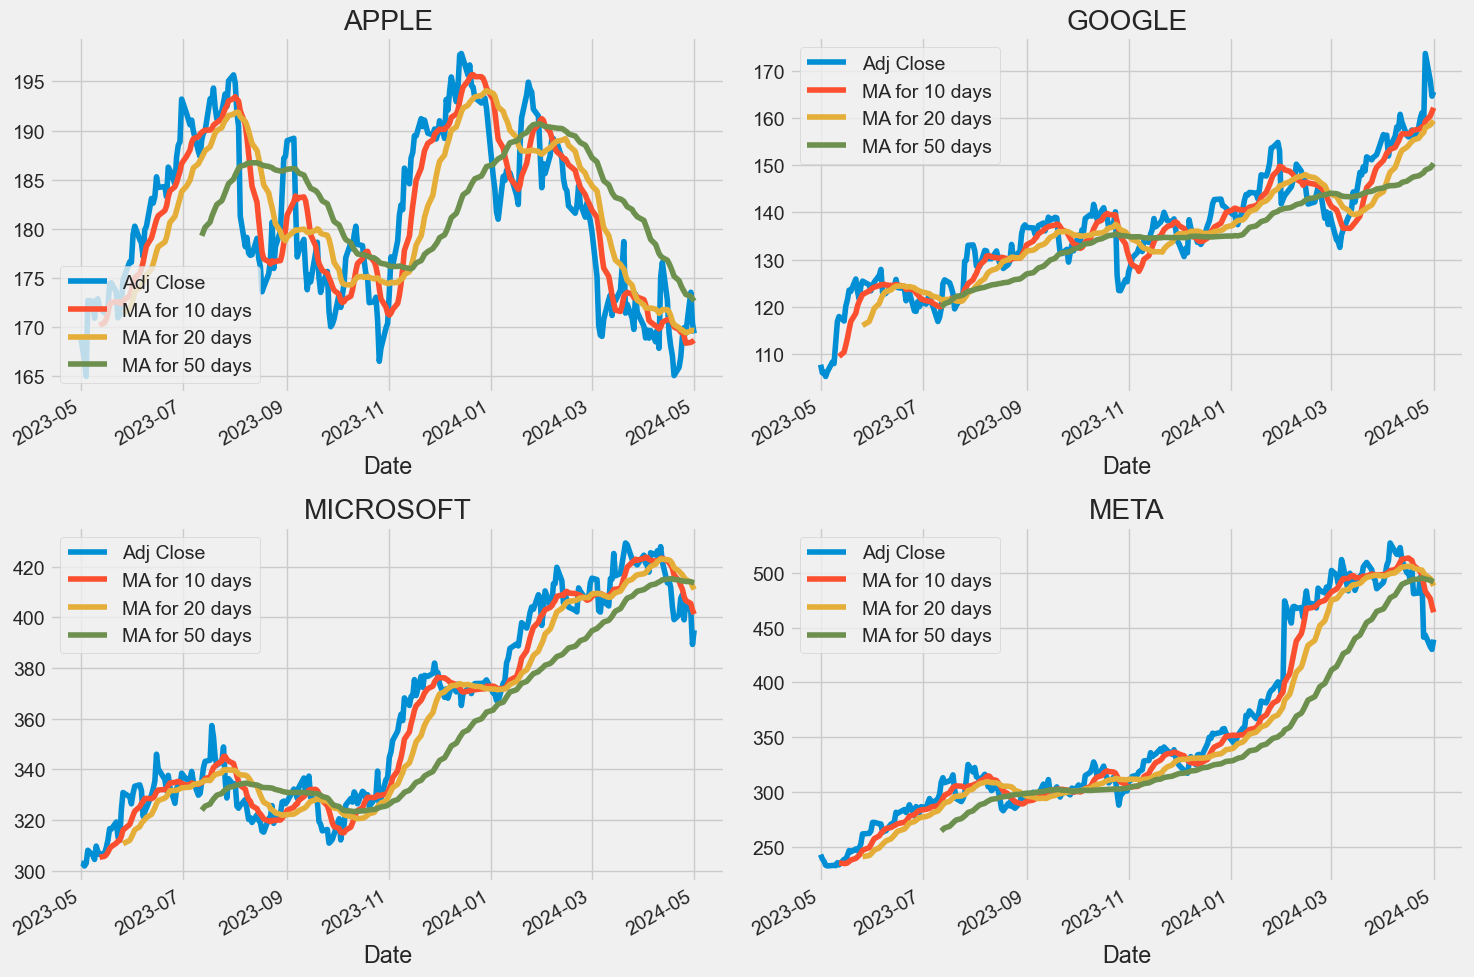

In [80]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

META[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('META')

fig.tight_layout()

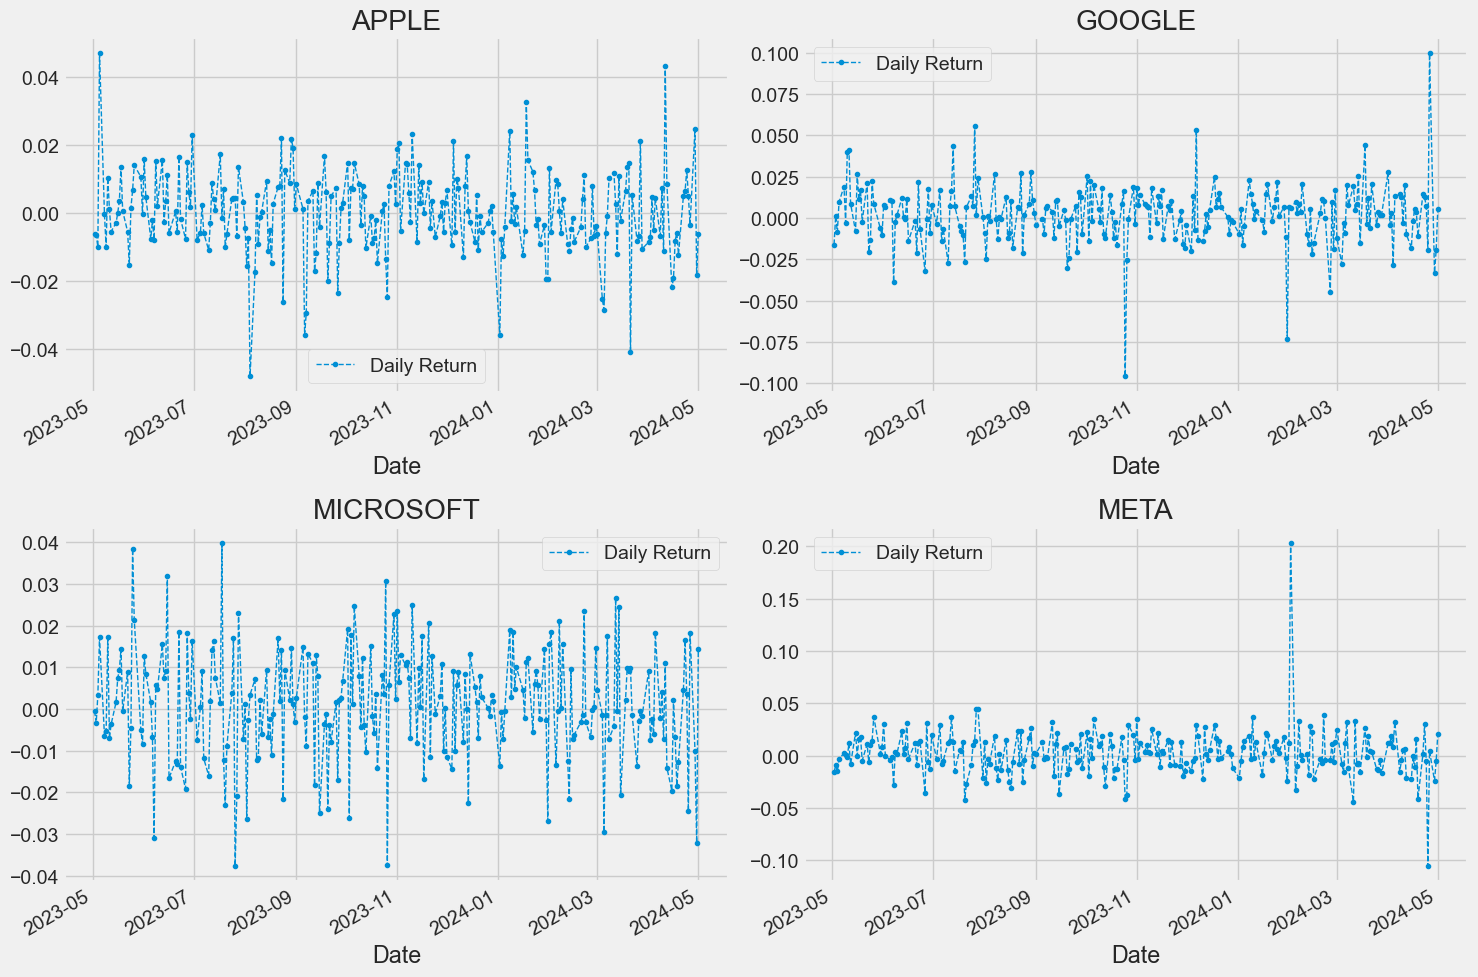

In [81]:
# Usamos pct_change para encontrar el porcentaje de cambio en el precio cada día
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Graficamos
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='.', linewidth=1)
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='.', linewidth=1)
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='.', linewidth=1)
axes[1,0].set_title('MICROSOFT')

META['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='.', linewidth=1)
axes[1,1].set_title('META')

fig.tight_layout()

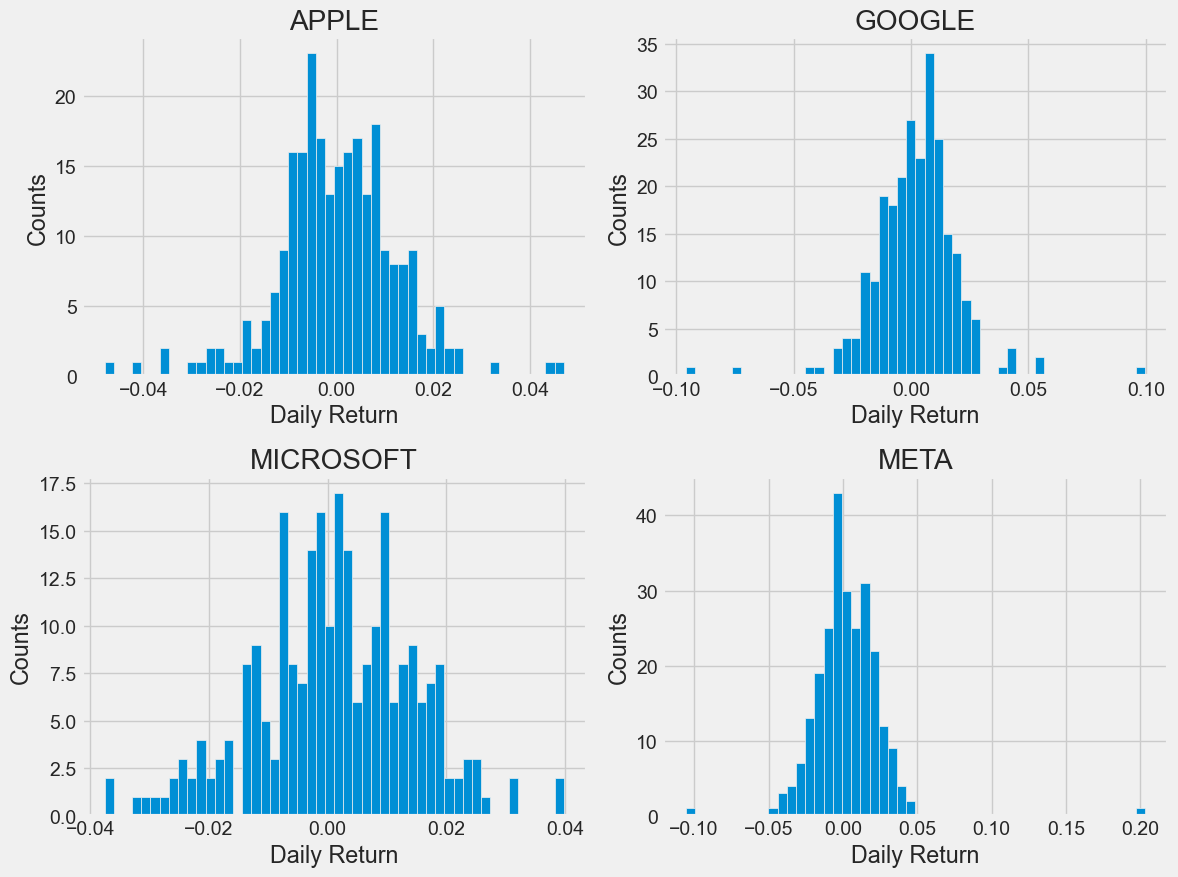

In [82]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [83]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,GOOG,META,MSFT
Date,,,,
2023-05-01,NaN,NaN,NaN,NaN
2023-05-02,-0.006191,-0.016062,-0.016202,-0.000491
2023-05-03,-0.006467,0.001321,-0.009238,-0.003307
2023-05-04,-0.009913,-0.008575,-0.014808,0.003318
2023-05-05,0.046927,0.009552,-0.003169,0.017157


c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


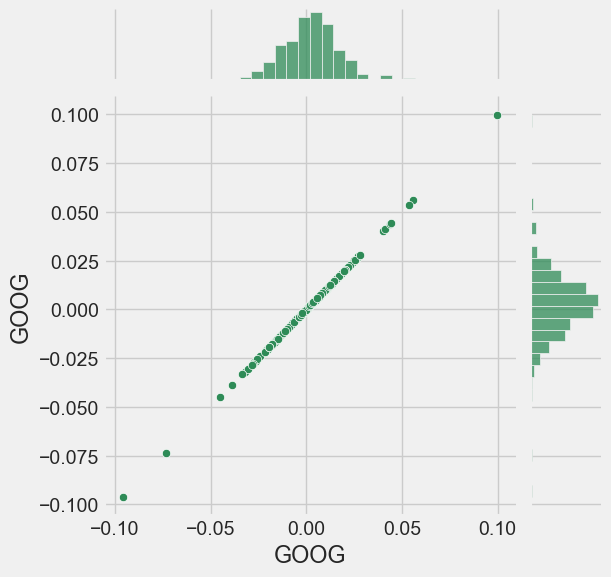

In [84]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


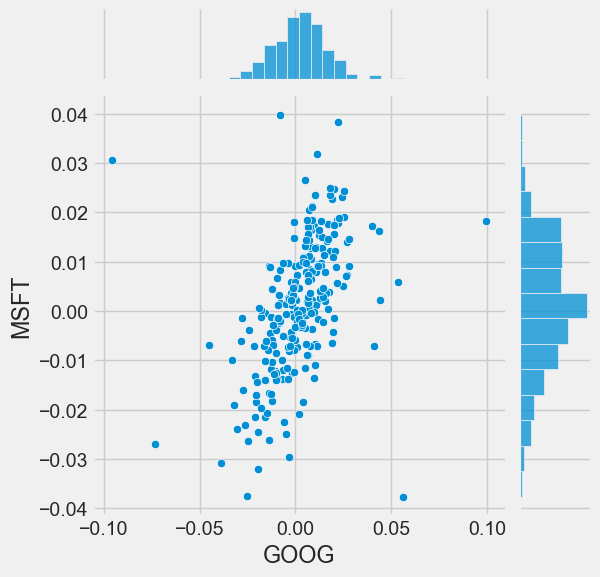

In [85]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

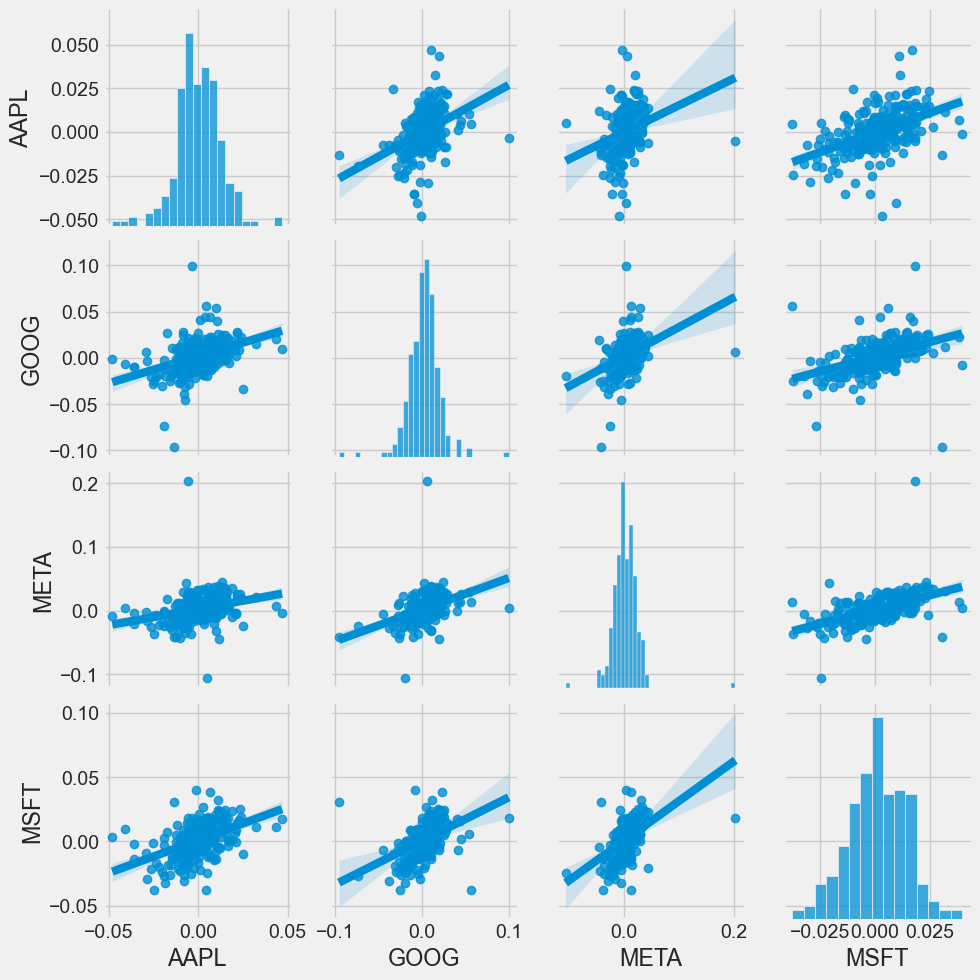

In [86]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

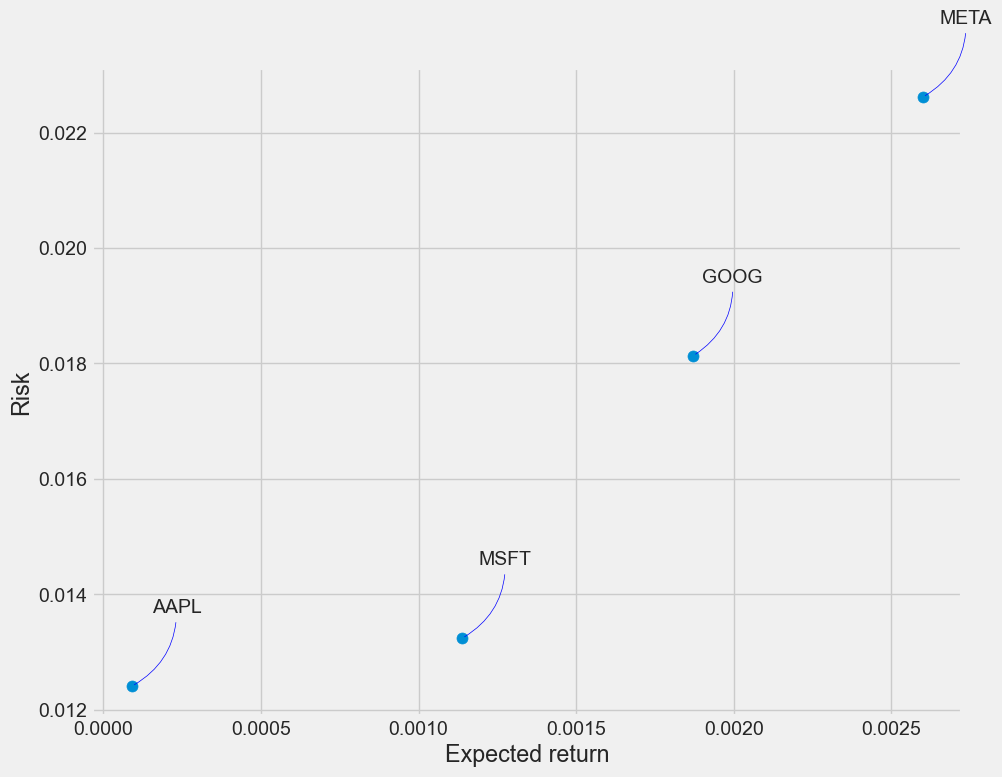

In [89]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Predicción con LSTM

In [31]:
# Cargamos los datos de las acciones que queremos analizar y predecir
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500644,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639428,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771558,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751301,394024400
...,...,...,...,...,...,...
2024-04-25,169.529999,170.610001,168.149994,169.889999,169.889999,50558300
2024-04-26,169.880005,171.339996,169.179993,169.300003,169.300003,44838400
2024-04-29,173.369995,176.029999,173.100006,173.500000,173.500000,68169400


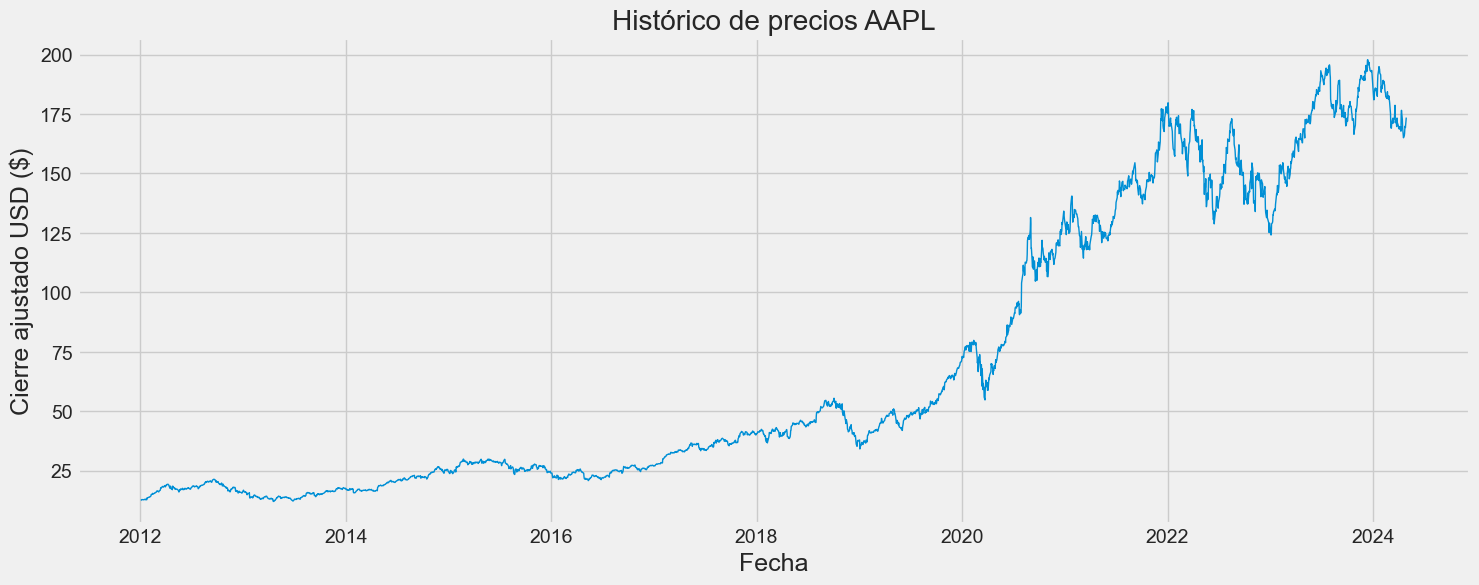

In [ ]:
#Hacemos una gráfica con el histórico de precios
plt.figure(figsize=(16,6))
plt.title('Histórico de precios AAPL')
plt.plot(df['Adj Close'], linewidth = 1)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre ajustado USD ($)', fontsize=18)
plt.show()

In [32]:
# Creamos un nuevo DataFrame con únicamente la columna Adj Close 
data = df.filter(['Adj Close'])
# Convertimos el dataframe en un numpy array
dataset = data.values
# Número de filas para entrenar el modelo
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2947

In [33]:
# Escalamos y normalizamos los datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00242954],
       [0.00278901],
       [0.00353567],
       ...,
       [0.86895769],
       [0.85190325],
       [0.84636191]])

In [34]:
# Escalamos y normalizamos los datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00242954],
       [0.00278901],
       [0.00353567],
       ...,
       [0.86895769],
       [0.85190325],
       [0.84636191]])

In [35]:
# Creamos el data set para entrenamiento con los datos escalados
train_data = scaled_data[0:int(training_data_len), :]
# Separamos los datos entre x_train y y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convertimos x_train y y_train en numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Cambiamos la forma de los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00242954, 0.00278901, 0.00353567, 0.00424652, 0.00413754,
       0.00438315, 0.00427091, 0.00408223, 0.0038252 , 0.00462067,
       0.00533802, 0.00511678, 0.00390491, 0.00506148, 0.00392281,
       0.00819281, 0.00786258, 0.00829368, 0.00922574, 0.00979018,
       0.00974301, 0.00956897, 0.01031071, 0.01100855, 0.01179912,
       0.01307605, 0.0157584 , 0.01579908, 0.01729236, 0.01840825,
       0.01649043, 0.01722892, 0.01721432, 0.01928505, 0.0189906 ,
       0.01953553, 0.0205148 , 0.02105975, 0.02262948, 0.02377305,
       0.02410325, 0.02421871, 0.02226345, 0.02179172, 0.02186171,
       0.02369981, 0.02421708, 0.02532813, 0.027947  , 0.03144113,
       0.03078718, 0.0307888 , 0.03331502, 0.0341056 , 0.03354276,
       0.03302872, 0.03249359, 0.03427152, 0.03549149, 0.03600228])]
[0.03474002112174271]

[array([0.00242954, 0.00278901, 0.00353567, 0.00424652, 0.00413754,
       0.00438315, 0.00427091, 0.00408223, 0.0038252 , 0.00462067,
       0.00533802, 0.00511678, 0.00

In [38]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Creamos el modelo LSTM
model = Sequential()

# Añadimos capas LSTM con 50 unidades
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
# Añadimos una capa densa con 25 unidades
model.add(Dense(25))
# Añadir una capa de salida densa con 1 unidad
model.add(Dense(1))

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Creamos el conjunto de datos de prueba
test_data = scaled_data[training_data_len - 60: , :]
# Creamos los conjuntos de datos x_test y y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convertimos a un numpy array
x_test = np.array(x_test)

# Cambiamos la forma de los datos
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Obtención de las predicciones
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculamos el RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print("Root Mean Square Error:",rmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2887/2887 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - loss: 0.0040
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Root Mean Square Error: 3.9884300672108166
Mean Absolute Error: 3.2177418370400708
Coeficiente de determinación (R cuadrado): 0.8078467768529218


C:\Users\Usuario\AppData\Local\Temp\ipykernel_15956\4283204316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


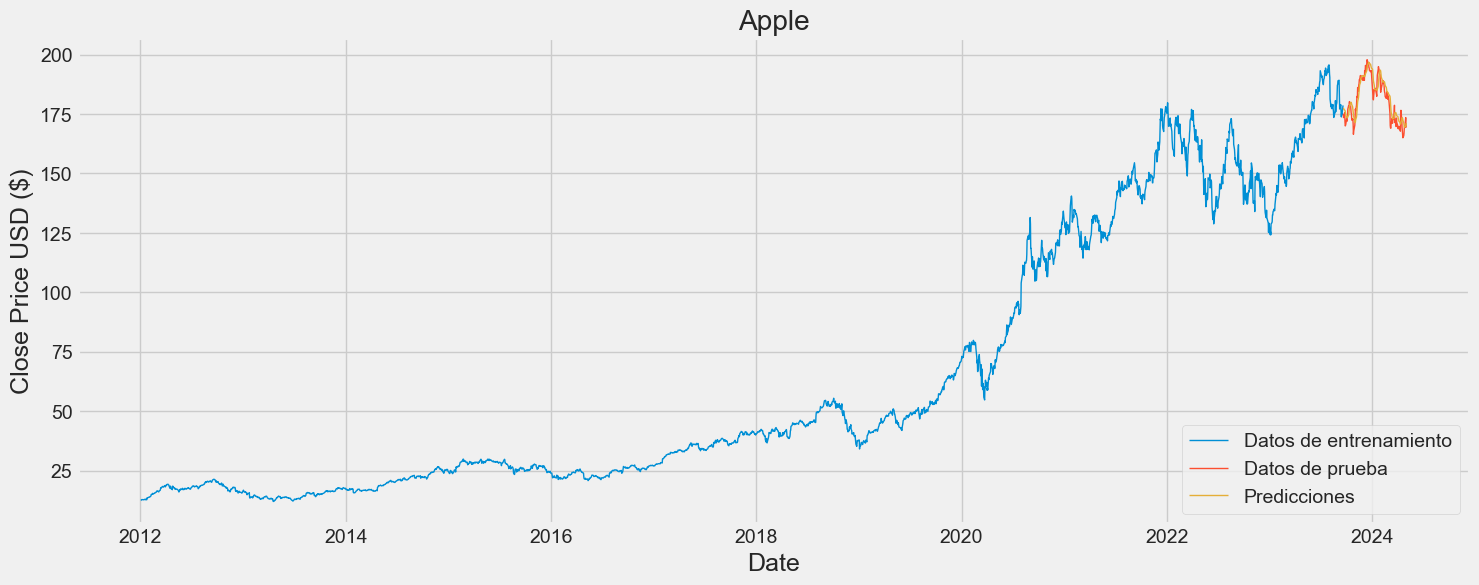

In [39]:
# Graficamos los datos
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Apple')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'], linewidth = 1)
plt.plot(valid[['Adj Close', 'Predictions']], linewidth = 1)
plt.legend(['Datos de entrenamiento', 'Datos de prueba', 'Predicciones'], loc='lower right')
plt.show()

In [40]:
# Cargamos los datos de las acciones que queremos analizar y predecir
df = pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2024-04-25,153.360001,158.279999,152.768005,157.949997,157.949997,36197800
2024-04-26,175.990005,176.419998,171.399994,173.690002,173.690002,56500800
2024-04-29,170.770004,171.380005,167.059998,167.899994,167.899994,35914600


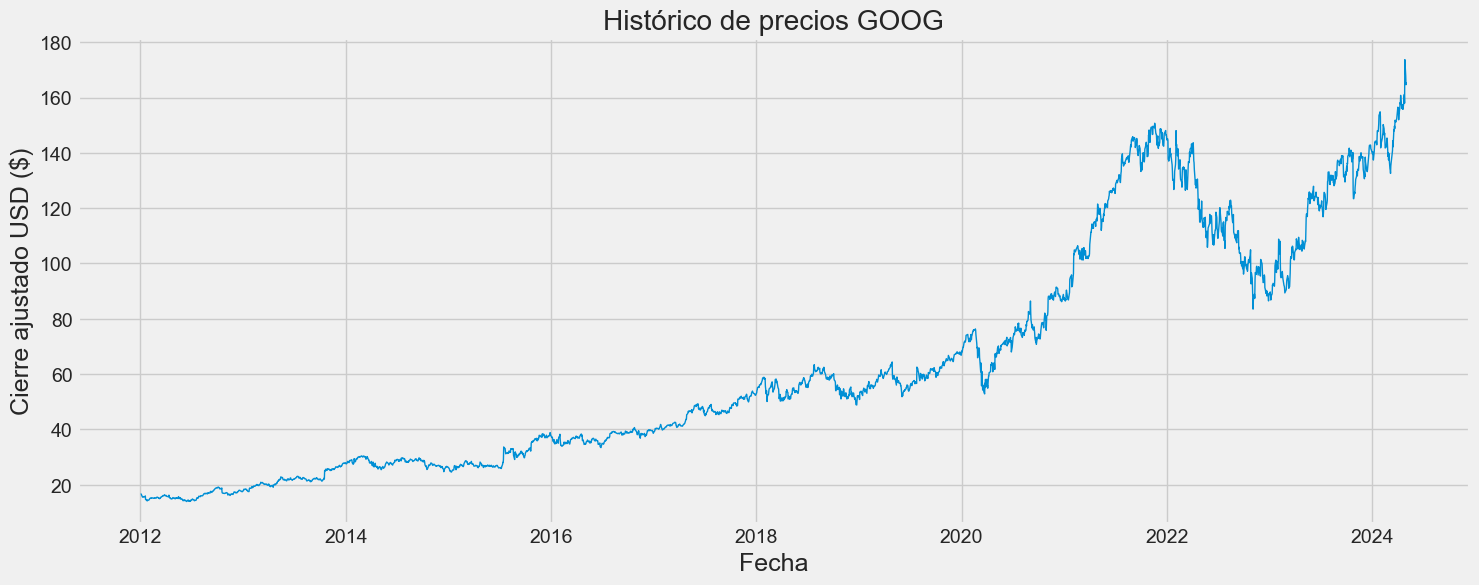

In [41]:
#Hacemos una gráfica con el histórico de precios
plt.figure(figsize=(16,6))
plt.title('Histórico de precios GOOG')
plt.plot(df['Adj Close'], linewidth = 1)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre ajustado USD ($)', fontsize=18)
plt.show()

In [42]:
# Creamos un nuevo DataFrame con únicamente la columna Adj Close 
data = df.filter(['Adj Close'])
# Convertimos el dataframe en un numpy array
dataset = data.values
# Número de filas para entrenar el modelo
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2947

In [43]:
# Escalamos y normalizamos los datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.01658095],
       [0.01702836],
       [0.01558322],
       ...,
       [0.96375943],
       [0.94335462],
       [0.94917568]])

In [44]:

# Creamos el data set para entrenamiento con los datos escalados
train_data = scaled_data[0:int(training_data_len), :]
# Separamos los datos entre x_train y y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convertimos x_train y y_train en numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Cambiamos la forma de los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.01658095, 0.01702836, 0.01558322, 0.01418174, 0.00988528,
       0.00999128, 0.01043091, 0.0110046 , 0.01027969, 0.01083935,
       0.01151438, 0.01255263, 0.0041998 , 0.00412653, 0.00341098,
       0.00162754, 0.00141084, 0.00326288, 0.00290588, 0.00328314,
       0.00339539, 0.00406261, 0.00581175, 0.00780097, 0.00743929,
       0.00791945, 0.00817043, 0.00730522, 0.00828579, 0.00790541,
       0.00725066, 0.00740032, 0.00710724, 0.00856641, 0.00762169,
       0.0073364 , 0.00792724, 0.00783526, 0.00925078, 0.00922896,
       0.00987592, 0.00969664, 0.00860538, 0.00715712, 0.00744396,
       0.00749698, 0.00642286, 0.00718674, 0.00915568, 0.00887664,
       0.00967794, 0.01028749, 0.01168118, 0.01160479, 0.01261655,
       0.01356283, 0.01302344, 0.01407416, 0.01371405, 0.01507657])]
[0.013930743734310483]

[array([0.01658095, 0.01702836, 0.01558322, 0.01418174, 0.00988528,
       0.00999128, 0.01043091, 0.0110046 , 0.01027969, 0.01083935,
       0.01151438, 0.01255263, 0.0

In [45]:

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Creamos el modelo LSTM
model = Sequential()

# Añadimos capas LSTM con 50 unidades
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
# Añadimos una capa densa con 25 unidades
model.add(Dense(25))
# Añadir una capa de salida densa con 1 unidad
model.add(Dense(1))

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Creamos el conjunto de datos de prueba
test_data = scaled_data[training_data_len - 60: , :]
# Creamos los conjuntos de datos x_test y y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convertimos a un numpy array
x_test = np.array(x_test)

# Cambiamos la forma de los datos
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Obtención de las predicciones
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculamos el RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print("Root Mean Square Error:",rmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2887/2887 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - loss: 0.0025
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Root Mean Square Error: 5.954990946823224
Mean Absolute Error: 5.11909415952621
Coeficiente de determinación (R cuadrado): 0.6082698131155915


C:\Users\Usuario\AppData\Local\Temp\ipykernel_15956\1700564971.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


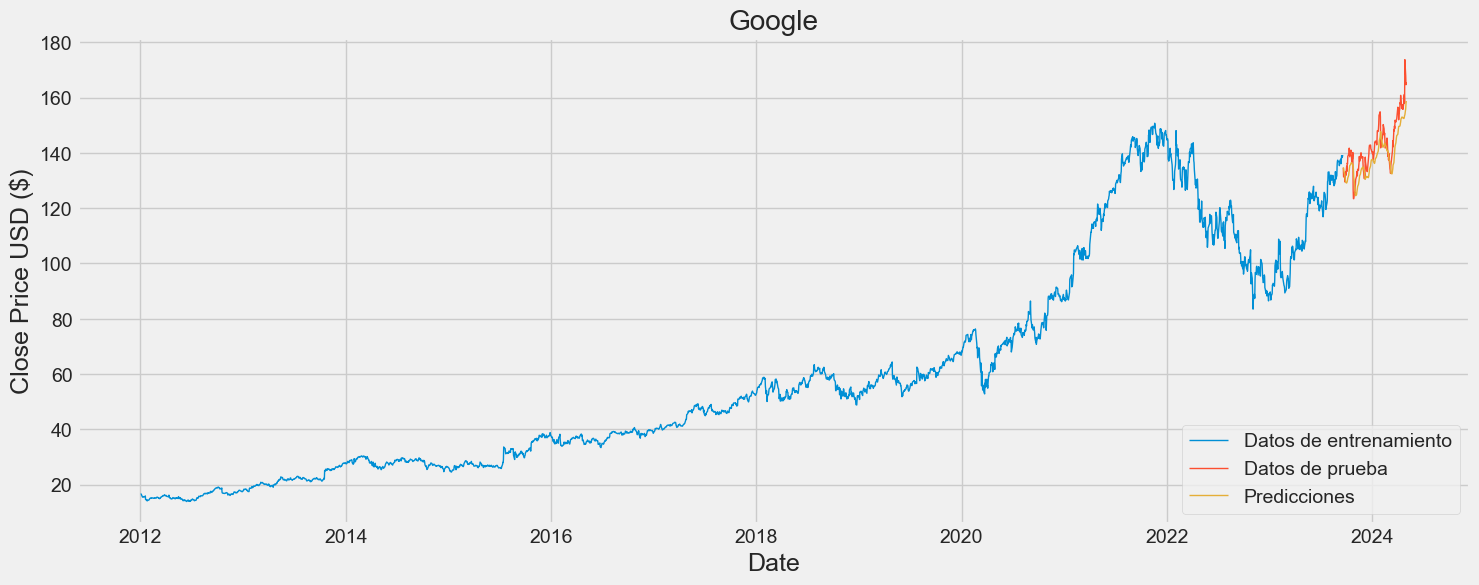

In [46]:

# Graficamos los datos
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Google')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'], linewidth = 1)
plt.plot(valid[['Adj Close', 'Predictions']], linewidth = 1)
plt.legend(['Datos de entrenamiento', 'Datos de prueba', 'Predicciones'], loc='lower right')
plt.show()

In [47]:
# Cargamos los datos de las acciones que queremos analizar y predecir
df = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())

df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238756,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738581,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960730,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301876,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008331,59706800
...,...,...,...,...,...,...
2024-04-25,394.029999,399.890015,388.029999,399.040009,399.040009,40586500
2024-04-26,412.170013,413.000000,405.760010,406.320007,406.320007,29694700
2024-04-29,405.250000,406.320007,399.190002,402.250000,402.250000,19582100


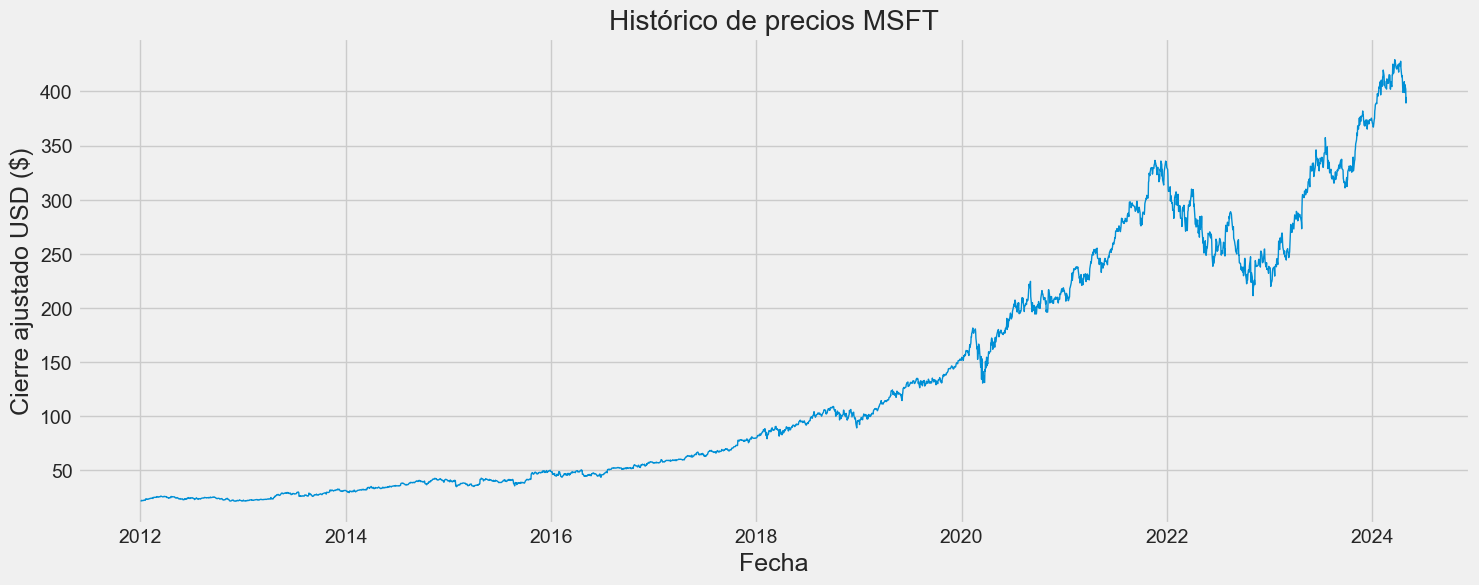

In [48]:

#Hacemos una gráfica con el histórico de precios
plt.figure(figsize=(16,6))
plt.title('Histórico de precios MSFT')
plt.plot(df['Adj Close'], linewidth = 1)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre ajustado USD ($)', fontsize=18)
plt.show()


In [49]:

# Creamos un nuevo DataFrame con únicamente la columna Adj Close 
data = df.filter(['Adj Close'])
# Convertimos el dataframe en un numpy array
dataset = data.values
# Número de filas para entrenar el modelo
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2947

In [50]:
# Escalamos y normalizamos los datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.        ],
       [0.00122467],
       [0.00176897],
       ...,
       [0.9335508 ],
       [0.90189428],
       [0.9156399 ]])

In [51]:

# Creamos el data set para entrenamiento con los datos escalados
train_data = scaled_data[0:int(training_data_len), :]
# Separamos los datos entre x_train y y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convertimos x_train y y_train en numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Cambiamos la forma de los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.        , 0.00122467, 0.00176897, 0.00260485, 0.00188561,
       0.00208001, 0.00184673, 0.00239102, 0.00287701, 0.00289644,
       0.00283813, 0.00262431, 0.00571515, 0.00575401, 0.00499589,
       0.00542355, 0.00530692, 0.00478205, 0.00552077, 0.00536524,
       0.00606505, 0.00618171, 0.00674544, 0.00666769, 0.00695927,
       0.0075619 , 0.00777572, 0.00725087, 0.00740637, 0.00715201,
       0.00676066, 0.009187  , 0.00910872, 0.00948049, 0.00914786,
       0.00934353, 0.00955878, 0.0093044 , 0.0103219 , 0.01006753,
       0.01114373, 0.01073282, 0.01018493, 0.00971532, 0.01026319,
       0.01059582, 0.01055669, 0.01065454, 0.01188729, 0.01208294,
       0.01223949, 0.0117503 , 0.01096762, 0.01055669, 0.01040016,
       0.01057626, 0.01059582, 0.01173072, 0.01159376, 0.01094805])]
[0.01081106299600617]

[array([0.        , 0.00122467, 0.00176897, 0.00260485, 0.00188561,
       0.00208001, 0.00184673, 0.00239102, 0.00287701, 0.00289644,
       0.00283813, 0.00262431, 0.00

In [58]:

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Creamos el modelo LSTM
model = Sequential()

# Añadimos capas LSTM con 50 unidades
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
# Añadimos una capa densa con 25 unidades
model.add(Dense(25))
# Añadir una capa de salida densa con 1 unidad
model.add(Dense(1))

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Creamos el conjunto de datos de prueba
test_data = scaled_data[training_data_len - 60: , :]
# Creamos los conjuntos de datos x_test y y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convertimos a un numpy array
x_test = np.array(x_test)

# Cambiamos la forma de los datos
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Obtención de las predicciones
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculamos el RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print("Root Mean Square Error:",rmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2887/2887 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - loss: 0.0016
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Root Mean Square Error: 7.855290391002842
Mean Absolute Error: 6.516805734942036
Coeficiente de determinación (R cuadrado): 0.9468252713328262


C:\Users\Usuario\AppData\Local\Temp\ipykernel_15956\1329947044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


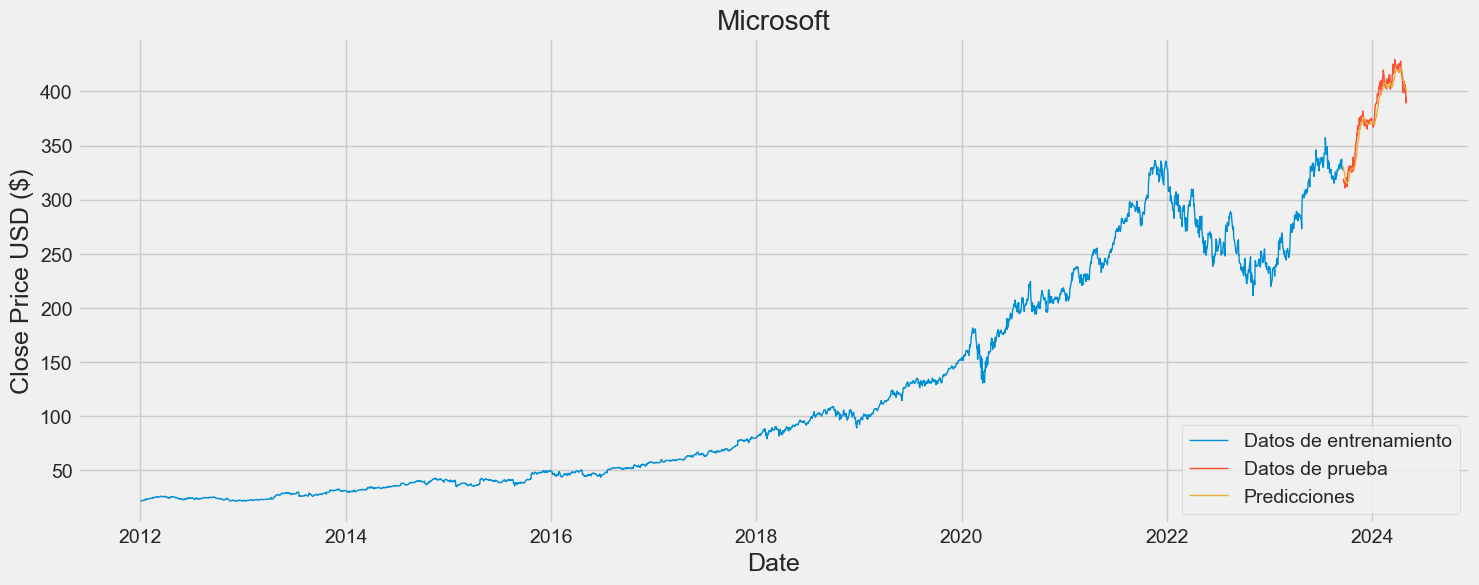

In [59]:
# Graficamos los datos
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Microsoft')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'], linewidth = 1)
plt.plot(valid[['Adj Close', 'Predictions']], linewidth = 1)
plt.legend(['Datos de entrenamiento', 'Datos de prueba', 'Predicciones'], loc='lower right')
plt.show()

In [60]:
# Cargamos los datos de las acciones que queremos analizar y predecir
df = pdr.get_data_yahoo('META', start='2012-01-01', end=datetime.now())

df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.189480,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.993931,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.967144,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.966084,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.994991,50237200
...,...,...,...,...,...,...
2024-04-25,421.399994,445.769989,414.500000,441.380005,441.380005,82890700
2024-04-26,441.459991,446.440002,431.959991,443.290009,443.290009,32691400
2024-04-29,439.559998,439.760010,428.559998,432.619995,432.619995,21502600


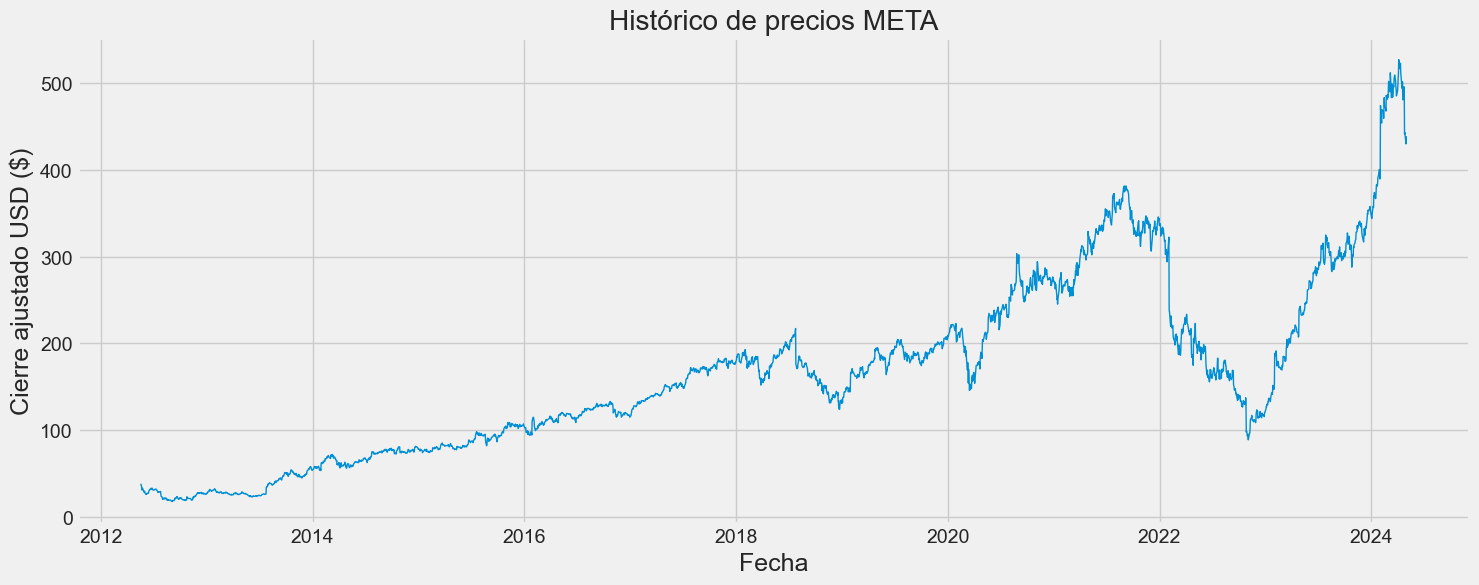

In [61]:


#Hacemos una gráfica con el histórico de precios
plt.figure(figsize=(16,6))
plt.title('Histórico de precios META')
plt.plot(df['Adj Close'], linewidth = 1)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cierre ajustado USD ($)', fontsize=18)
plt.show()


In [62]:


# Creamos un nuevo DataFrame con únicamente la columna Adj Close 
data = df.filter(['Adj Close'])
# Convertimos el dataframe en un numpy array
dataset = data.values
# Número de filas para entrenar el modelo
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len


2857

In [63]:

# Escalamos y normalizamos los datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04018272],
       [0.03195016],
       [0.02601096],
       ...,
       [0.81413918],
       [0.80933179],
       [0.82703093]])

In [64]:
# Creamos el data set para entrenamiento con los datos escalados
train_data = scaled_data[0:int(training_data_len), :]
# Separamos los datos entre x_train y y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convertimos x_train y y_train en numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Cambiamos la forma de los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.04018272, 0.03195016, 0.02601096, 0.02797109, 0.02999003,
       0.02779468, 0.02177707, 0.02050299, 0.02326678, 0.01958172,
       0.01797442, 0.01595548, 0.017798  , 0.01681794, 0.01836644,
       0.01819003, 0.01895448, 0.01869966, 0.020699  , 0.02407043,
       0.02681462, 0.02779468, 0.02718704, 0.02765747, 0.03002923,
       0.0280887 , 0.03012723, 0.02842192, 0.02671661, 0.02620697,
       0.02556013, 0.02640299, 0.02693222, 0.02744186, 0.02830431,
       0.02693222, 0.02595215, 0.02563853, 0.02546212, 0.0206206 ,
       0.02030698, 0.02230631, 0.02209069, 0.02162026, 0.02160066,
       0.02101262, 0.02275714, 0.01787641, 0.01172159, 0.01062392,
       0.00780133, 0.00617442, 0.00452791, 0.00658605, 0.00821295,
       0.00586079, 0.00586079, 0.00642924, 0.00799734, 0.00758571])]
[0.0051943492946955536]

[array([0.04018272, 0.03195016, 0.02601096, 0.02797109, 0.02999003,
       0.02779468, 0.02177707, 0.02050299, 0.02326678, 0.01958172,
       0.01797442, 0.01595548, 0.

In [65]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Creamos el modelo LSTM
model = Sequential()

# Añadimos capas LSTM con 50 unidades
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
# Añadimos una capa densa con 25 unidades
model.add(Dense(25))
# Añadir una capa de salida densa con 1 unidad
model.add(Dense(1))

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Creamos el conjunto de datos de prueba
test_data = scaled_data[training_data_len - 60: , :]
# Creamos los conjuntos de datos x_test y y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convertimos a un numpy array
x_test = np.array(x_test)

# Cambiamos la forma de los datos
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Obtención de las predicciones
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculamos el RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print("Root Mean Square Error:",rmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2797/2797 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - loss: 0.0016
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step
Root Mean Square Error: 19.30961068523338
Mean Absolute Error: 15.592172241210937
Coeficiente de determinación (R cuadrado): 0.939328834802016


C:\Users\Usuario\AppData\Local\Temp\ipykernel_15956\1898372624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


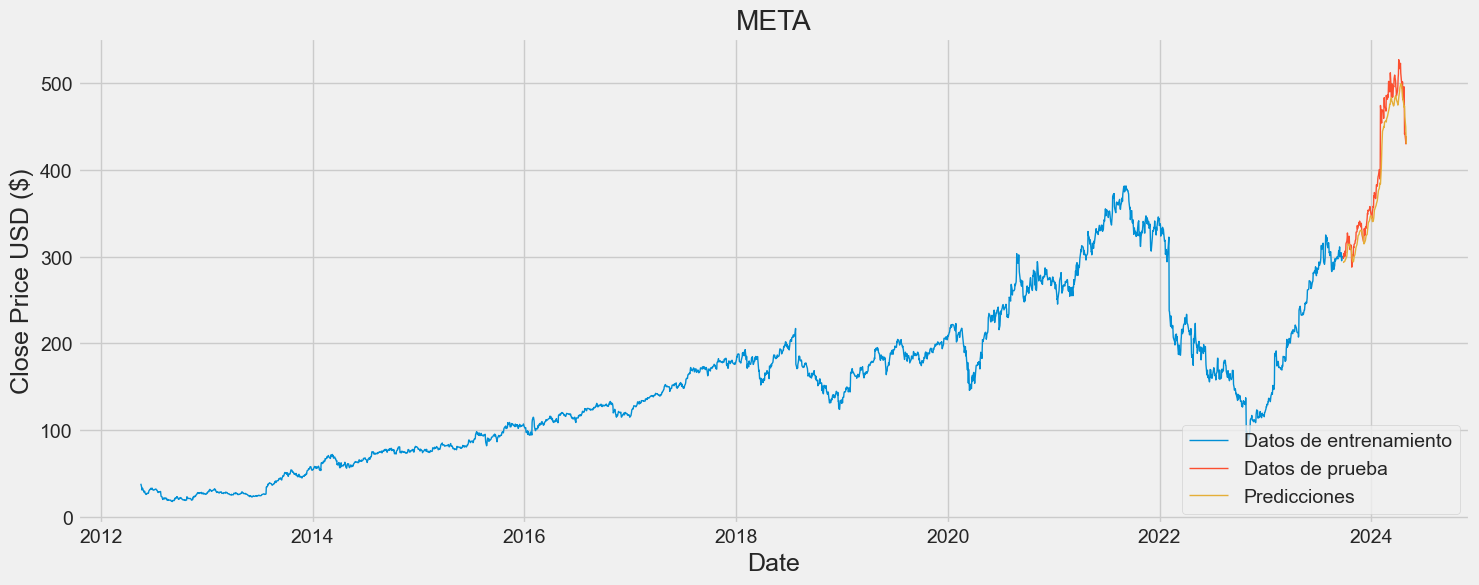

In [66]:
# Graficamos los datos
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('META')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'], linewidth = 1)
plt.plot(valid[['Adj Close', 'Predictions']], linewidth = 1)
plt.legend(['Datos de entrenamiento', 'Datos de prueba', 'Predicciones'], loc='lower right')
plt.show()

Predicción con XGBoost

In [67]:
df2 = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
Datos = df2.filter(["Date", "Adj Close"])
Datos.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2012-01-03,12.433826
2012-01-04,12.500647
2012-01-05,12.639430
2012-01-06,12.771559
2012-01-09,12.751303


In [68]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd

# Calculamos la diferencia de precios como una nueva característica para conseguir una predicción más precisa
Datos['Price_Diff'] = Datos['Adj Close'].diff()

# Eliminamos la primera fila que contendría un valor NaN después del cálculo de la diferencia
datos = Datos.dropna()

# Separamos los datos en conjuntos de entrenamiento y prueba
training_data_len = int(len(datos) * 0.95)
training_data = datos.iloc[:training_data_len]
test_data = datos.iloc[training_data_len:]

# Convertimos las fechas en características numéricas
X_train = np.array(range(len(training_data))).reshape(-1, 1)
X_train = np.hstack((X_train, training_data['Price_Diff'].values.reshape(-1, 1)))
y_train = training_data['Adj Close'].values

# Iniciamos el modelo XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Definimos los parámetros a ajustar
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0,2],
    'n_estimators': [100, 200, 300]
}

# Iniciamos el GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid,
                           scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Realizamos la búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtenemos el mejor modelo
best_model = grid_search.best_estimator_

# Convertimos las fechas de prueba en características numéricas
X_test = np.array(range(training_data_len, len(datos))).reshape(-1, 1)
X_test = np.hstack((X_test, test_data['Price_Diff'].values.reshape(-1, 1)))
y_test = test_data['Adj Close'].values

# Hacemos predicciones en el conjunto de prueba
predictions = best_model.predict(X_test)

# Calculamos el RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Square Error (XGBoost):", rmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Root Mean Square Error (XGBoost): 9.089197621696629
Mean Absolute Error: 7.97371321458083
Coeficiente de determinación (R cuadrado): -0.0040771824165590775


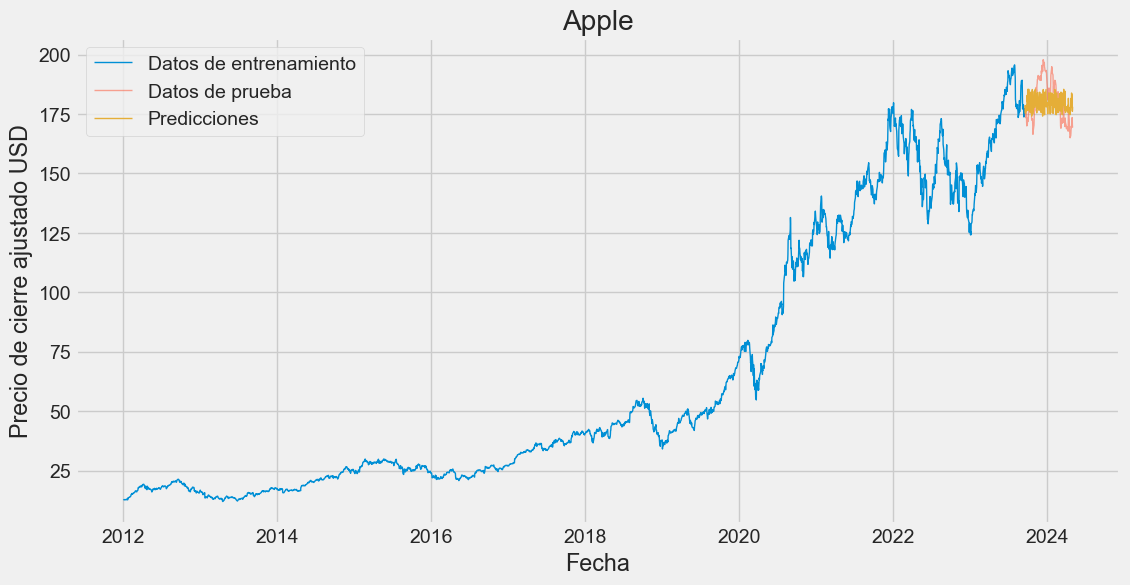

In [69]:
import matplotlib.pyplot as plt

# Graficamos los datos
plt.figure(figsize=(12, 6))
plt.plot(training_data.index, training_data['Adj Close'], label='Datos de entrenamiento', linewidth = 1)
plt.plot(test_data.index, test_data['Adj Close'], label='Datos de prueba', alpha=0.5, linewidth = 1)
plt.plot(test_data.index, predictions, label='Predicciones', linestyle='-', linewidth = 1)
plt.title('Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado USD')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
df2 = pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())
Datos = df2.filter(["Date", "Adj Close"])
Datos.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2012-01-03,16.573130
2012-01-04,16.644611
2012-01-05,16.413727
2012-01-06,16.189817
2012-01-09,15.503389


In [71]:

import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd

# Calculamos la diferencia de precios como una nueva característica para conseguir una predicción más precisa
Datos['Price_Diff'] = Datos['Adj Close'].diff()

# Eliminamos la primera fila que contendría un valor NaN después del cálculo de la diferencia
datos = Datos.dropna()

# Separamos los datos en conjuntos de entrenamiento y prueba
training_data_len = int(len(datos) * 0.95)
training_data = datos.iloc[:training_data_len]
test_data = datos.iloc[training_data_len:]

# Convertimos las fechas en características numéricas
X_train = np.array(range(len(training_data))).reshape(-1, 1)
X_train = np.hstack((X_train, training_data['Price_Diff'].values.reshape(-1, 1)))
y_train = training_data['Adj Close'].values

# Iniciamos el modelo XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Definimos los parámetros a ajustar
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0,2],
    'n_estimators': [100, 200, 300]
}

# Iniciamos el GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid,
                           scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Realizamos la búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtenemos el mejor modelo
best_model = grid_search.best_estimator_

# Convertimos las fechas de prueba en características numéricas
X_test = np.array(range(training_data_len, len(datos))).reshape(-1, 1)
X_test = np.hstack((X_test, test_data['Price_Diff'].values.reshape(-1, 1)))
y_test = test_data['Adj Close'].values

# Hacemos predicciones en el conjunto de prueba
predictions = best_model.predict(X_test)

# Calculamos el RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Square Error (XGBoost):", rmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Root Mean Square Error (XGBoost): 10.874631072510619
Mean Absolute Error: 8.042982345972305
Coeficiente de determinación (R cuadrado): -0.31360092995365907


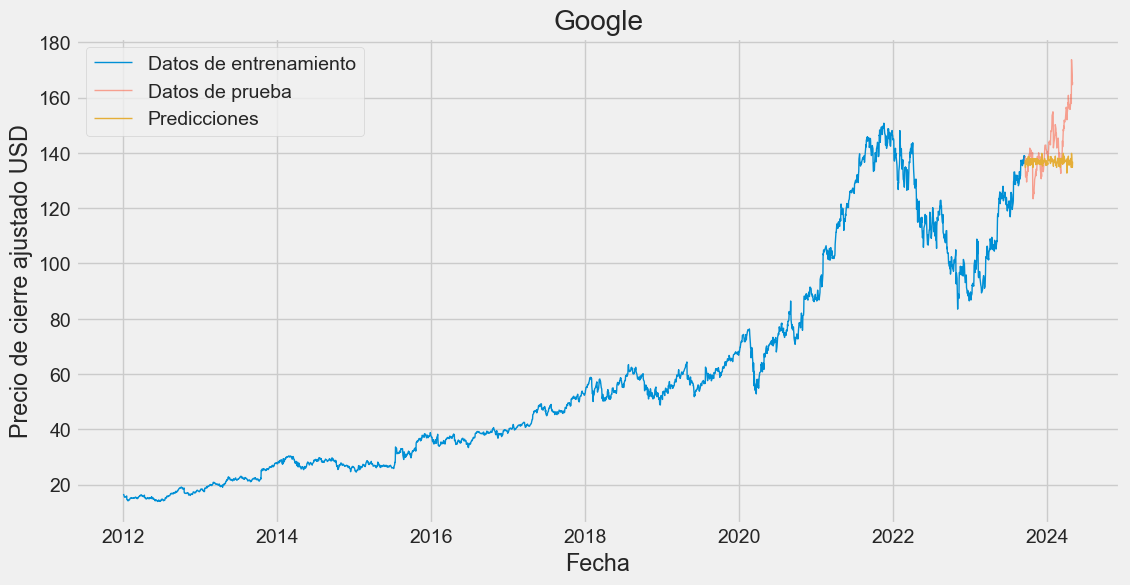

In [72]:

import matplotlib.pyplot as plt

# Graficamos los datos
plt.figure(figsize=(12, 6))
plt.plot(training_data.index, training_data['Adj Close'], label='Datos de entrenamiento', linewidth = 1)
plt.plot(test_data.index, test_data['Adj Close'], label='Datos de prueba', alpha=0.5, linewidth = 1)
plt.plot(test_data.index, predictions, label='Predicciones', linestyle='-', linewidth = 1)
plt.title('Google')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado USD')
plt.legend()
plt.grid(True)
plt.show()



In [73]:
df2 = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
Datos = df2.filter(["Date", "Adj Close"])
Datos.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2012-01-03,21.238752
2012-01-04,21.738583
2012-01-05,21.960732
2012-01-06,22.301874
2012-01-09,22.008329


In [74]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd

# Calculamos la diferencia de precios como una nueva característica para conseguir una predicción más precisa
Datos['Price_Diff'] = Datos['Adj Close'].diff()

# Eliminamos la primera fila que contendría un valor NaN después del cálculo de la diferencia
datos = Datos.dropna()

# Separamos los datos en conjuntos de entrenamiento y prueba
training_data_len = int(len(datos) * 0.95)
training_data = datos.iloc[:training_data_len]
test_data = datos.iloc[training_data_len:]

# Convertimos las fechas en características numéricas
X_train = np.array(range(len(training_data))).reshape(-1, 1)
X_train = np.hstack((X_train, training_data['Price_Diff'].values.reshape(-1, 1)))
y_train = training_data['Adj Close'].values

# Iniciamos el modelo XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Definimos los parámetros a ajustar
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0,2],
    'n_estimators': [100, 200, 300]
}

# Iniciamos el GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid,
                           scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Realizamos la búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtenemos el mejor modelo
best_model = grid_search.best_estimator_

# Convertimos las fechas de prueba en características numéricas
X_test = np.array(range(training_data_len, len(datos))).reshape(-1, 1)
X_test = np.hstack((X_test, test_data['Price_Diff'].values.reshape(-1, 1)))
y_test = test_data['Adj Close'].values

# Hacemos predicciones en el conjunto de prueba
predictions = best_model.predict(X_test)

# Calculamos el RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Square Error (XGBoost):", rmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Root Mean Square Error (XGBoost): 59.937544552785354
Mean Absolute Error: 52.01904296875
Coeficiente de determinación (R cuadrado): -2.0672885091692113


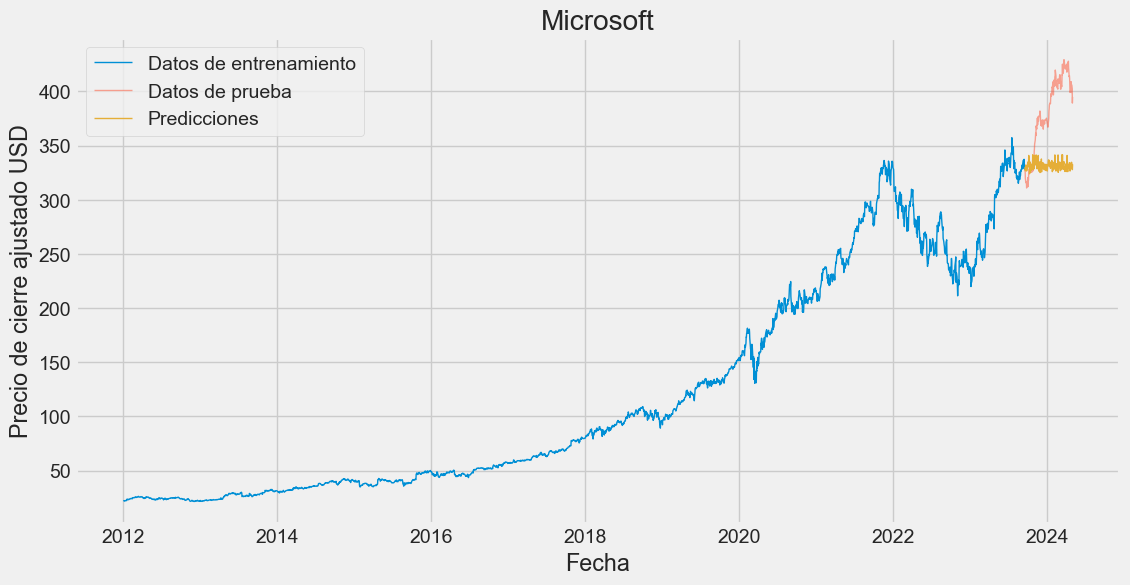

In [75]:

import matplotlib.pyplot as plt

# Graficamos los datos
plt.figure(figsize=(12, 6))
plt.plot(training_data.index, training_data['Adj Close'], label='Datos de entrenamiento', linewidth = 1)
plt.plot(test_data.index, test_data['Adj Close'], label='Datos de prueba', alpha=0.5, linewidth = 1)
plt.plot(test_data.index, predictions, label='Predicciones', linestyle='-', linewidth = 1)
plt.title('Microsoft')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado USD')
plt.legend()
plt.grid(True)
plt.show()



In [76]:
df2 = pdr.get_data_yahoo('META', start='2012-01-01', end=datetime.now())
Datos = df2.filter(["Date", "Adj Close"])
Datos.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2012-05-18,38.189480
2012-05-21,33.993931
2012-05-22,30.967144
2012-05-23,31.966084
2012-05-24,32.994991


In [77]:

import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd

# Calculamos la diferencia de precios como una nueva característica para conseguir una predicción más precisa
Datos['Price_Diff'] = Datos['Adj Close'].diff()

# Eliminamos la primera fila que contendría un valor NaN después del cálculo de la diferencia
datos = Datos.dropna()

# Separamos los datos en conjuntos de entrenamiento y prueba
training_data_len = int(len(datos) * 0.95)
training_data = datos.iloc[:training_data_len]
test_data = datos.iloc[training_data_len:]

# Convertimos las fechas en características numéricas
X_train = np.array(range(len(training_data))).reshape(-1, 1)
X_train = np.hstack((X_train, training_data['Price_Diff'].values.reshape(-1, 1)))
y_train = training_data['Adj Close'].values

# Iniciamos el modelo XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Definimos los parámetros a ajustar
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0,2, 1],
    'n_estimators': [100, 200, 300, 1100]
}

# Iniciamos el GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid,
                           scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Realizamos la búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtenemos el mejor modelo
best_model = grid_search.best_estimator_

# Convertimos las fechas de prueba en características numéricas
X_test = np.array(range(training_data_len, len(datos))).reshape(-1, 1)
X_test = np.hstack((X_test, test_data['Price_Diff'].values.reshape(-1, 1)))
y_test = test_data['Adj Close'].values

# Hacemos predicciones en el conjunto de prueba
predictions = best_model.predict(X_test)

# Calculamos el RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Square Error (XGBoost):", rmse)

# Calculamos el MAE
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)

# Calculamos el coeficiente de determinación (R cuadrado)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R cuadrado):", r2)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Mejores hiperparámetros: {'learning_rate': 2, 'max_depth': 4, 'n_estimators': 1100}
Root Mean Square Error (XGBoost): 127.03546048071829
Mean Absolute Error: 101.09463642448779
Coeficiente de determinación (R cuadrado): -1.6150635830076348


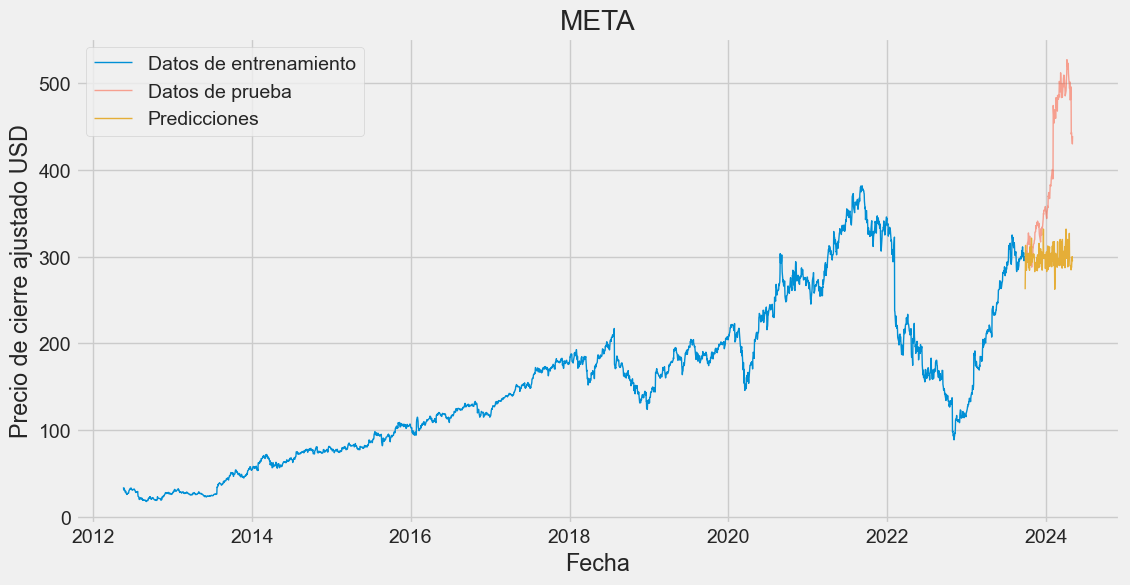

In [78]:

import matplotlib.pyplot as plt

# Graficamos los datos
plt.figure(figsize=(12, 6))
plt.plot(training_data.index, training_data['Adj Close'], label='Datos de entrenamiento', linewidth = 1)
plt.plot(test_data.index, test_data['Adj Close'], label='Datos de prueba', alpha=0.5, linewidth = 1)
plt.plot(test_data.index, predictions, label='Predicciones', linestyle='-', linewidth = 1)
plt.title('META')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado USD')
plt.legend()
plt.grid(True)
plt.show()

